# Linear Regression

A very simple linear regression model to serve as a benchmark against which the performance of other techniques can be compared. We will not try to optimise this model.

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time

matplotlib.rcParams['figure.figsize'] = (16, 9)
pd.options.display.max_columns = 999

## Load Dataset

In [2]:
csp = pd.read_csv('../datasets/california-solar-power.csv', parse_dates=[0])
csp.set_index('LocalTime', inplace=True)
csp = csp.resample('H').mean()
csp.reset_index(inplace=True)
csp.rename({'LocalTime':'DateTime'}, axis=1, inplace=True)
print(csp.shape)
csp.head()

(8760, 406)


,DateTime,pv1,pv2,pv3,pv4,pv5,pv6,pv7,pv8,pv9,pv10,pv11,pv12,pv13,pv14,pv15,pv16,pv17,pv18,pv19,pv20,pv21,pv22,pv23,pv24,pv25,pv26,pv27,pv28,pv29,pv30,pv31,pv32,pv33,pv34,pv35,pv36,pv37,pv38,pv39,pv40,pv41,pv42,pv43,pv44,pv45,pv46,pv47,pv48,pv49,pv50,pv51,pv52,pv53,pv54,pv55,pv56,pv57,pv58,pv59,pv60,pv61,pv62,pv63,pv64,pv65,pv66,pv67,pv68,pv69,pv70,pv71,pv72,pv73,pv74,pv75,pv76,pv77,pv78,pv79,pv80,pv81,pv82,pv83,pv84,pv85,pv86,pv87,pv88,pv89,pv90,pv91,pv92,pv93,pv94,pv95,pv96,pv97,pv98,pv99,pv100,pv101,pv102,pv103,pv104,pv105,pv106,pv107,pv108,pv109,pv110,pv111,pv112,pv113,pv114,pv115,pv116,pv117,pv118,pv119,pv120,pv121,pv122,pv123,pv124,pv125,pv126,pv127,pv128,pv129,pv130,pv131,pv132,pv133,pv134,pv135,pv136,pv137,pv138,pv139,pv140,pv141,pv142,pv143,pv144,pv145,pv146,pv147,pv148,pv149,pv150,pv151,pv152,pv153,pv154,pv155,pv156,pv157,pv158,pv159,pv160,pv161,pv162,pv163,pv164,pv165,pv166,pv167,pv168,pv169,pv170,pv171,pv172,pv173,pv174,pv175,pv176,pv177,pv178,pv179,pv180,pv181,pv182,pv183,pv184,pv185,pv186,pv187,pv188,pv189,pv190,pv191,pv192,pv193,pv194,pv195,pv196,pv197,pv198,pv199,pv200,pv201,pv202,pv203,pv204,pv205,pv206,pv207,pv208,pv209,pv210,pv211,pv212,pv213,pv214,pv215,pv216,pv217,pv218,pv219,pv220,pv221,pv222,pv223,pv224,pv225,pv226,pv227,pv228,pv229,pv230,pv231,pv232,pv233,pv234,pv235,pv236,pv237,pv238,pv239,pv240,pv241,pv242,pv243,pv244,pv245,pv246,pv247,pv248,pv249,pv250,pv251,pv252,pv253,pv254,pv255,pv256,pv257,pv258,pv259,pv260,pv261,pv262,pv263,pv264,pv265,pv266,pv267,pv268,pv269,pv270,pv271,pv272,pv273,pv274,pv275,pv276,pv277,pv278,pv279,pv280,pv281,pv282,pv283,pv284,pv285,pv286,pv287,pv288,pv289,pv290,pv291,pv292,pv293,pv294,pv295,pv296,pv297,pv298,pv299,pv300,pv301,pv302,pv303,pv304,pv305,pv306,pv307,pv308,pv309,pv310,pv311,pv312,pv313,pv314,pv315,pv316,pv317,pv318,pv319,pv320,pv321,pv322,pv323,pv324,pv325,pv326,pv327,pv328,pv329,pv330,pv331,pv332,pv333,pv334,pv335,pv336,pv337,pv338,pv339,pv340,pv341,pv342,pv343,pv344,pv345,pv346,pv347,pv348,pv349,pv350,pv351,pv352,pv353,pv354,pv355,pv356,pv357,pv358,pv359,pv360,pv361,pv362,pv363,pv364,pv365,pv366,pv367,pv368,pv369,pv370,pv371,pv372,pv373,pv374,pv375,pv376,pv377,pv378,pv379,pv380,pv381,pv382,pv383,pv384,pv385,pv386,pv387,pv388,pv389,pv390,pv391,pv392,pv393,pv394,pv395,pv396,pv397,pv398,pv399,pv400,pv401,pv402,pv403,pv404,pv405
0,2006-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2006-01-01 01:00:00,0.0,

In [3]:
test_length = 500
three_weeks = 24*3*7

## Define Error Metrics

In [4]:
def calc_MASE(training_series, testing_series, prediction_series):
    n = len(training_series) - 1
    d = np.abs(np.diff(training_series)).sum()/ n
    errors = np.abs(testing_series - prediction_series)
    return np.mean(errors) / d


def calc_sMASE(training_series, testing_series, prediction_series, seasonality=24):
    a = training_series.iloc[seasonality:].values
    b = training_series.iloc[:-seasonality].values
    d = np.sum(np.abs(a-b)) / len(a)
    errors = np.abs(testing_series - prediction_series)
    return np.mean(errors) / d

## Example Linear Regression Model

First, we create some functions to readily prepare datasets for each household.

In [5]:
def select_solar(solar):
    df = csp.iloc[:, [0, solar]]
    return df

In [6]:
def create_features(solar_df, window=24):
    df = solar_df.copy()
    # One hot encode day of week
    day_names = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
    for i in range(7):
        df[day_names[i]] = (df['DateTime'].dt.dayofweek == i).astype(int)

    # One hot encode hour of day
    hour_names = ['hour_%s' % str(i) for i in range(24)]
    for i in range(24):
        df[hour_names[i]] = (df['DateTime'].dt.hour == i).astype(int)

    # Continuous variable for years
    df['annual'] = (df['DateTime'] - df['DateTime'][0]).dt.days / 365

    # Moving average
    df['ma'] = df.iloc[:, 1].rolling(window).mean()
    df['ma'] = df['ma'].shift(test_length)
    df.dropna(inplace=True)
    
    return df

In [7]:
def split_data(df, test_length=test_length):
    X_train = df.iloc[:-test_length, 2:]
    X_test = df.iloc[-test_length:, 2:]

    y_train = df.iloc[:-test_length, 1]
    y_test = df.iloc[-test_length:, 1]
    
    return X_train, X_test, y_train, y_test

Illustrate model for an example household. Ridge regression is a sensible choice for regularising our model.

In [8]:
from sklearn.linear_model import Ridge

solar = 1
df = select_solar(solar)
df = create_features(df)
X_train, X_test, y_train, y_test = split_data(df)

lr = Ridge()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred[y_pred < 0] = 0
MASE = calc_MASE(y_train[-three_weeks:], y_test, y_pred)
sMASE = calc_sMASE(y_train[-three_weeks:], y_test, y_pred)
print("MASE: {:.4f}".format(MASE))
print("sMASE: {:.4f}".format(sMASE))

MASE: 0.8124
sMASE: 1.7077


Plot example predictions.

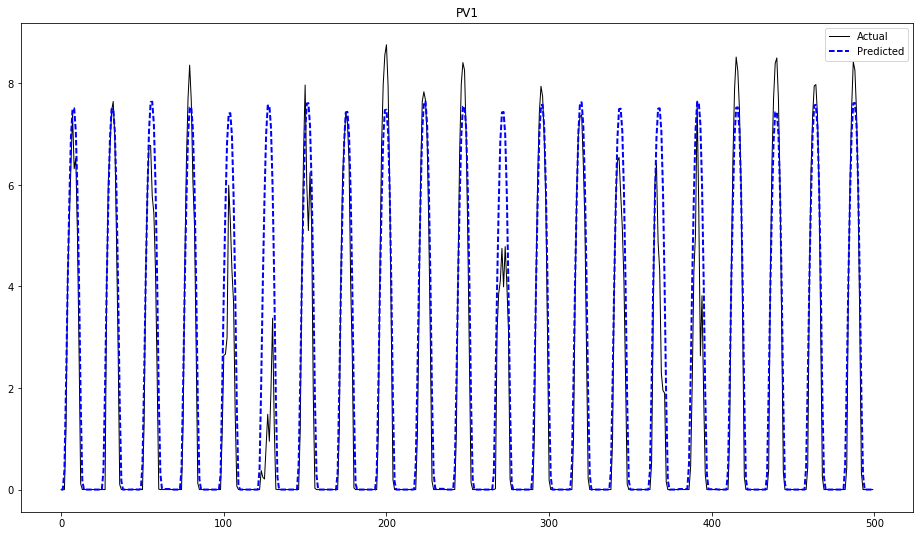

In [9]:
plt.plot(y_test.values, label='Actual', c='k', linewidth=1)
plt.plot(y_pred, label='Predicted', c='b', linestyle='--', linewidth=2)
plt.legend()
plt.title('PV%s' % solar);

Examine example linear regression model coefficients.

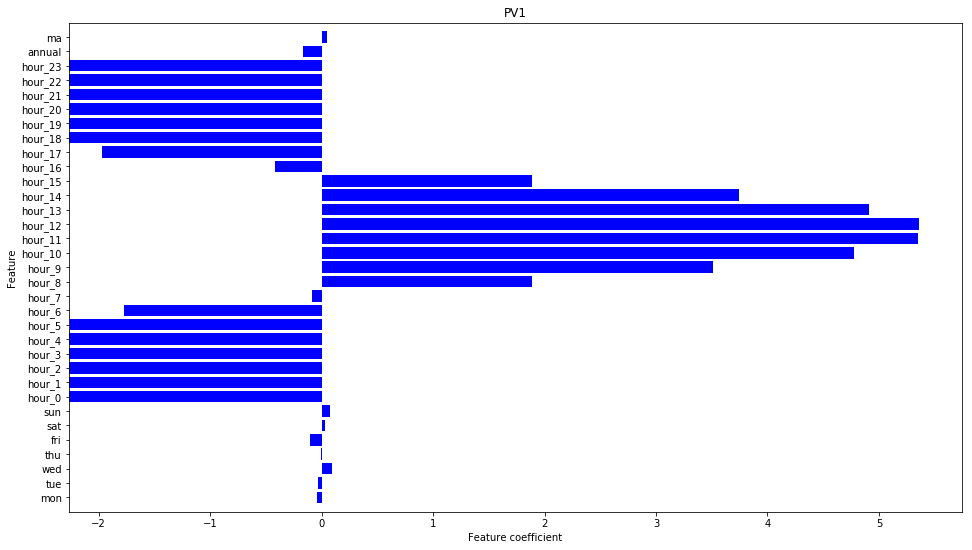

In [10]:
coefs = lr.coef_
cols = df.columns[2:]
params = pd.Series(coefs, index=cols)

fig, ax = plt.subplots()
ax.barh(range(len(params)), params.values, align='center', color='b')
plt.xlabel('Feature coefficient')
plt.yticks(np.arange(len(params)), params.index)
plt.ylabel('Feature')
plt.ylim(-1, len(params))
plt.title('PV%s' % solar);

## Evaluate Linear Regresion

In [11]:
results = csp.copy()

for solar in range(1, len(csp.columns)):
    df = select_solar(solar)
    df = create_features(df)
    X_train, X_test, y_train, y_test = split_data(df)

    lr = Ridge()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    results['pv%s_pred' % solar] = np.nan
    results['pv%s_pred' % solar].iloc[-test_length:] = y_pred

C:\Users\aidan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
results0 = results.iloc[:, 1:].copy()
results0[results0 < 0] = 0
results0['DateTime'] = results['DateTime']

In [13]:
results0.head()

,pv1,pv2,pv3,pv4,pv5,pv6,pv7,pv8,pv9,pv10,pv11,pv12,pv13,pv14,pv15,pv16,pv17,pv18,pv19,pv20,pv21,pv22,pv23,pv24,pv25,pv26,pv27,pv28,pv29,pv30,pv31,pv32,pv33,pv34,pv35,pv36,pv37,pv38,pv39,pv40,pv41,pv42,pv43,pv44,pv45,pv46,pv47,pv48,pv49,pv50,pv51,pv52,pv53,pv54,pv55,pv56,pv57,pv58,pv59,pv60,pv61,pv62,pv63,pv64,pv65,pv66,pv67,pv68,pv69,pv70,pv71,pv72,pv73,pv74,pv75,pv76,pv77,pv78,pv79,pv80,pv81,pv82,pv83,pv84,pv85,pv86,pv87,pv88,pv89,pv90,pv91,pv92,pv93,pv94,pv95,pv96,pv97,pv98,pv99,pv100,pv101,pv102,pv103,pv104,pv105,pv106,pv107,pv108,pv109,pv110,pv111,pv112,pv113,pv114,pv115,pv116,pv117,pv118,pv119,pv120,pv121,pv122,pv123,pv124,pv125,pv126,pv127,pv128,pv129,pv130,pv131,pv132,pv133,pv134,pv135,pv136,pv137,pv138,pv139,pv140,pv141,pv142,pv143,pv144,pv145,pv146,pv147,pv148,pv149,pv150,pv151,pv152,pv153,pv154,pv155,pv156,pv157,pv158,pv159,pv160,pv161,pv162,pv163,pv164,pv165,pv166,pv167,pv168,pv169,pv170,pv171,pv172,pv173,pv174,pv175,pv176,pv177,pv178,pv179,pv180,pv181,pv182,pv183,pv184,pv185,pv186,pv187,pv188,pv189,pv190,pv191,pv192,pv193,pv194,pv195,pv196,pv197,pv198,pv199,pv200,pv201,pv202,pv203,pv204,pv205,pv206,pv207,pv208,pv209,pv210,pv211,pv212,pv213,pv214,pv215,pv216,pv217,pv218,pv219,pv220,pv221,pv222,pv223,pv224,pv225,pv226,pv227,pv228,pv229,pv230,pv231,pv232,pv233,pv234,pv235,pv236,pv237,pv238,pv239,pv240,pv241,pv242,pv243,pv244,pv245,pv246,pv247,pv248,pv249,pv250,pv251,pv252,pv253,pv254,pv255,pv256,pv257,pv258,pv259,pv260,pv261,pv262,pv263,pv264,pv265,pv266,pv267,pv268,pv269,pv270,pv271,pv272,pv273,pv274,pv275,pv276,pv277,pv278,pv279,pv280,pv281,pv282,pv283,pv284,pv285,pv286,pv287,pv288,pv289,pv290,pv291,pv292,pv293,pv294,pv295,pv296,pv297,pv298,pv299,pv300,pv301,pv302,pv303,pv304,pv305,pv306,pv307,pv308,pv309,pv310,pv311,pv312,pv313,pv314,pv315,pv316,pv317,pv318,pv319,pv320,pv321,pv322,pv323,pv324,pv325,pv326,pv327,pv328,pv329,pv330,pv331,pv332,pv333,pv334,pv335,pv336,pv337,pv338,pv339,pv340,pv341,pv342,pv343,pv344,pv345,pv346,pv347,pv348,pv349,pv350,pv351,pv352,pv353,pv354,pv355,pv356,pv357,pv358,pv359,pv360,pv361,pv362,pv363,pv364,pv365,pv366,pv367,pv368,pv369,pv370,pv371,pv372,pv373,pv374,pv375,pv376,pv377,pv378,pv379,pv380,pv381,pv382,pv383,pv384,pv385,pv386,pv387,pv388,pv389,pv390,pv391,pv392,pv393,pv394,pv395,pv396,pv397,pv398,pv399,pv400,pv401,pv402,pv403,pv404,pv405,pv1_pred,pv2_pred,pv3_pred,pv4_pred,pv5_pred,pv6_pred,pv7_pred,pv8_pred,pv9_pred,pv10_pred,pv11_pred,pv12_pred,pv13_pred,pv14_pred,pv15_pred,pv16_pred,pv17_pred,pv18_pred,pv19_pred,pv20_pred,pv21_pred,pv22_pred,pv23_pred,pv24_pred,pv25_pred,pv26_pred,pv27_pred,pv28_pred,pv29_pred,pv30_pred,pv31_pred,pv32_pred,pv33_pred,pv34_pred,pv35_pred,pv36_pred,pv37_pred,pv38_pred,pv39_pred,pv40_pred,pv41_pred,pv42_pred,pv43_pred,pv44_pred,pv45_pred,pv46_pred,pv47_pred,pv48_pred,pv49_pred,pv50_pred,pv51_pred,pv52_pred,pv53_pred,pv54_pred,pv55_pred,pv56_pred,pv57_pred,pv58_pred,pv59_pred,pv60_pred,pv61_pred,pv62_pred,pv63_pred,pv64_pred,pv65_pred,pv66_pred,pv67_pred,pv68_pred,pv69_pred,pv70_pred,pv71_pred,pv72_pred,pv73_pred,pv74_pred,pv75_pred,pv76_pred,pv77_pred,pv78_pred,pv79_pred,pv80_pred,pv81_pred,pv82_pred,pv83_pred,pv84_pred,pv85_pred,pv86_pred,pv87_pred,pv88_pred,pv89_pred,pv90_pred,pv91_pred,pv92_pred,pv93_pred,pv94_pred,pv95_pred,pv96_pred,pv97_pred,pv98_pred,pv99_pred,pv100_pred,pv101_pred,pv102_pred,pv103_pred,pv104_pred,pv105_pred,pv106_pred,pv107_pred,pv108_pred,pv109_pred,pv110_pred,pv111_pred,pv112_pred,pv113_pred,pv114_pred,pv115_pred,pv116_pred,pv117_pred,pv118_pred,pv119_pred,pv120_pred,pv121_pred,pv122_pred,pv123_pred,pv124_pred,pv125_pred,pv126_pred,pv127_pred,pv128_pred,pv129_pred,pv130_pred,pv131_pred,pv132_pred,pv133_pred,pv134_pred,pv135_pred,pv136_pred,pv137_pred,pv138_pred,pv139_pred,pv140_pred,pv141_pred,pv142_pred,pv143_pred,pv144_pred,pv145_pred,pv146_pred,pv147_pred,pv148_pred,pv149_pred,pv150_pred,pv151_pred,pv152_pred,pv153_pred,pv154_pred,pv155_pred,pv156_pred,pv157_pred,pv158_pred,pv159_pred,pv160_pred,pv161_pred,pv162_pred,pv1

In [14]:
MASEs = []
sMASEs = []
for col in csp.columns[1:]:
    MASEs.append(calc_MASE(results0[col].iloc[-(test_length+three_weeks):-test_length],
                           results0[col].iloc[-test_length:],
                           results0['%s_pred' % col].iloc[-test_length:]))
    sMASEs.append(calc_sMASE(results0[col].iloc[-(test_length+three_weeks):-test_length],
                             results0[col].iloc[-test_length:],
                             results0['%s_pred' % col].iloc[-test_length:]))

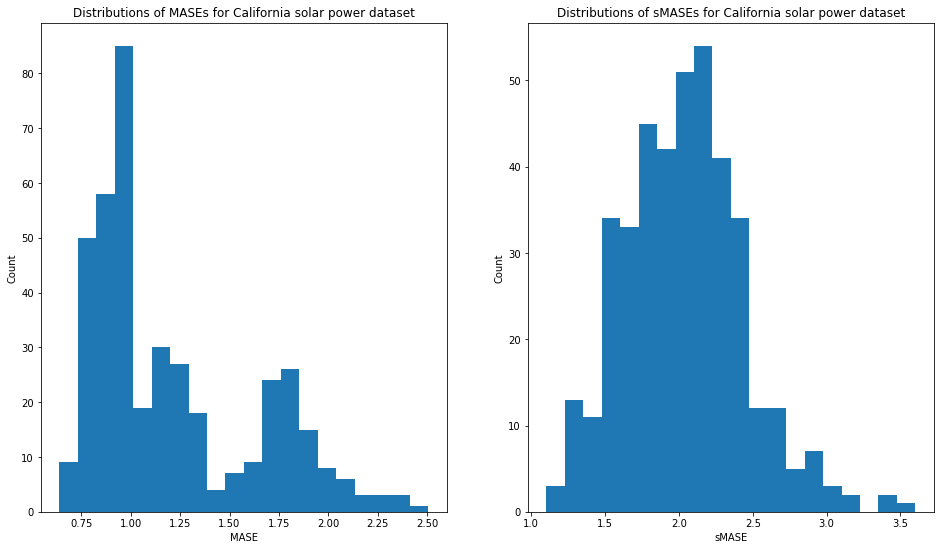

In [15]:
fig, ax = plt.subplots(1, 2)
ax[0].hist(MASEs, bins=20)
ax[0].set_title('Distributions of MASEs for California solar power dataset')
ax[0].set_xlabel('MASE')
ax[0].set_ylabel('Count')
ax[1].hist(sMASEs, bins=20)
ax[1].set_title('Distributions of sMASEs for California solar power dataset')
ax[1].set_xlabel('sMASE')
ax[1].set_ylabel('Count');

In [16]:
MASE = np.mean(MASEs)
sMASE = np.mean(sMASEs)
print("Overall MASE: {:.4f}".format(MASE))
print("Overall sMASE: {:.4f}".format(sMASE))

Overall MASE: 1.2065
Overall sMASE: 2.0363


Show some example forecasts.

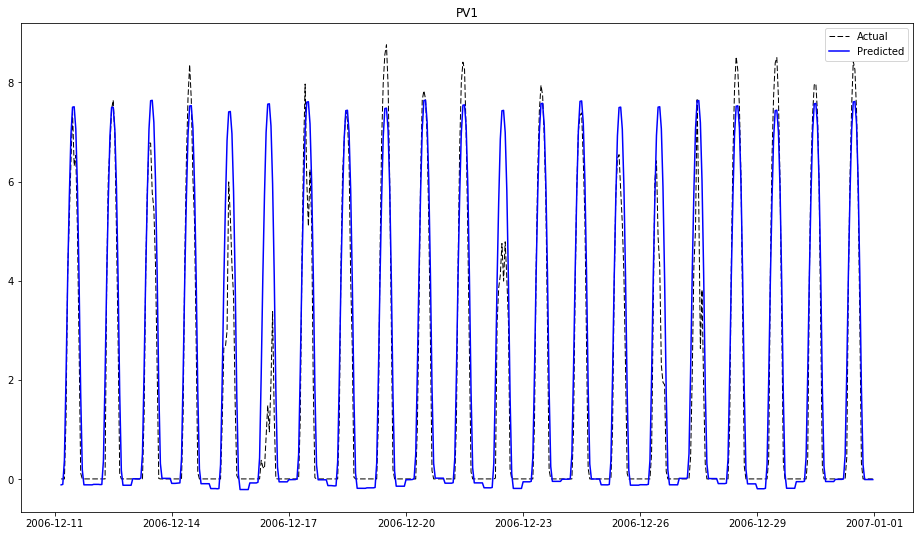

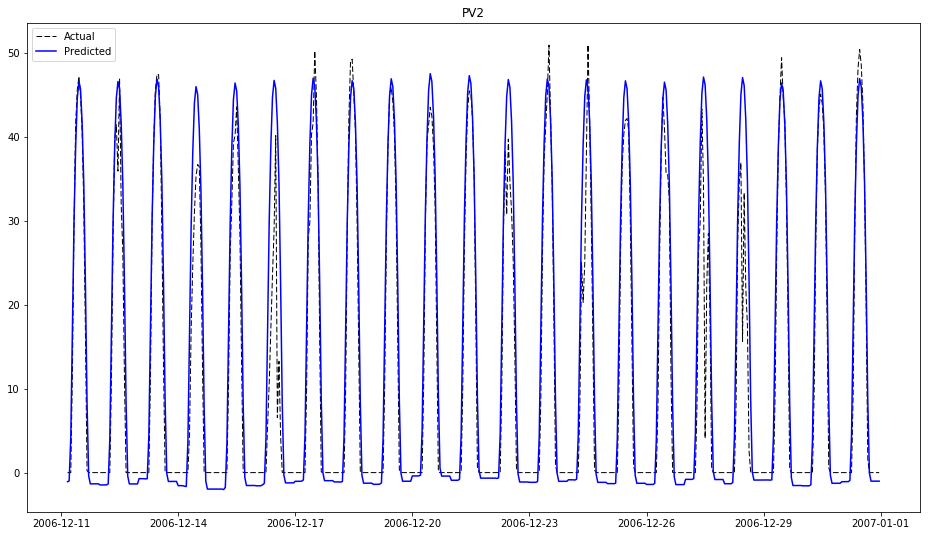

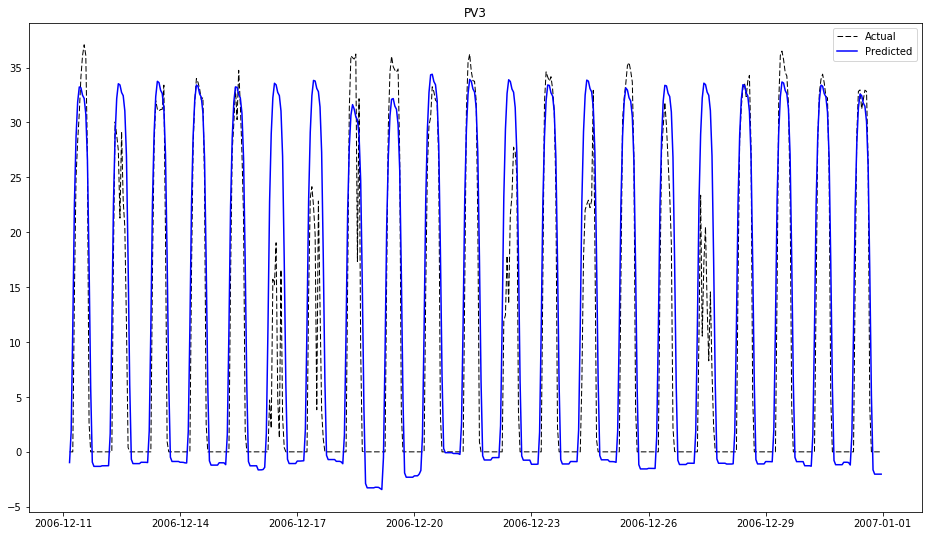

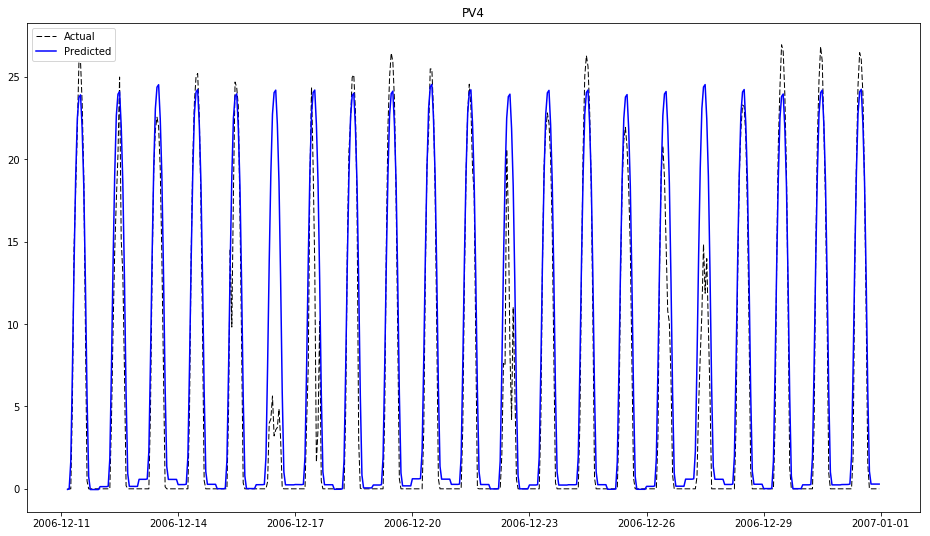

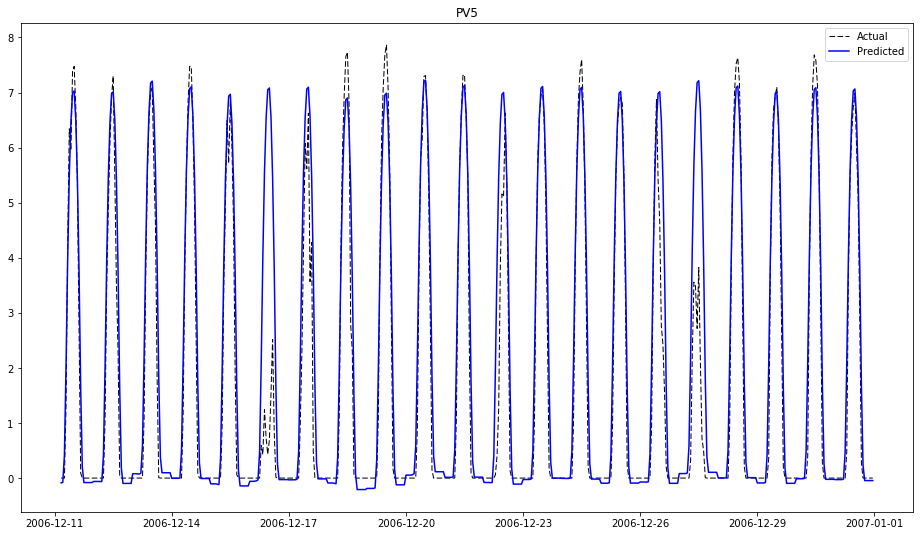

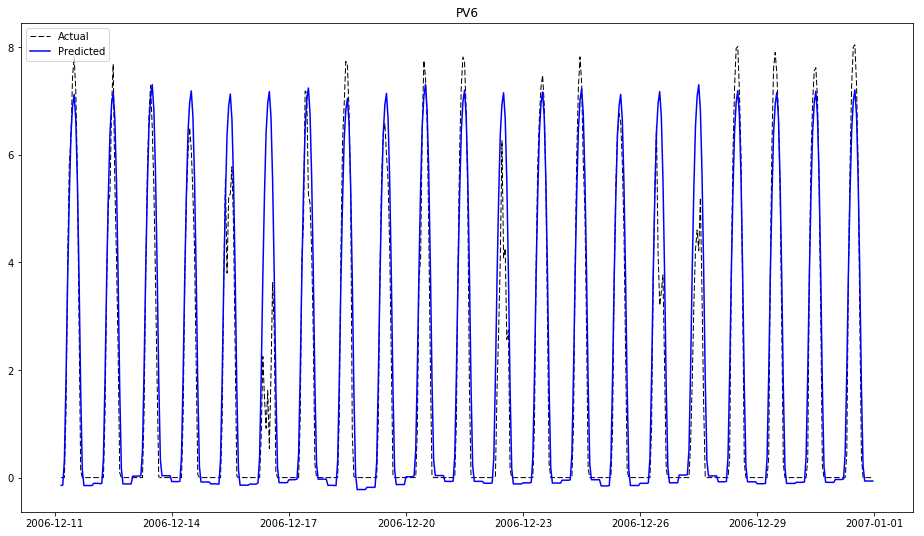

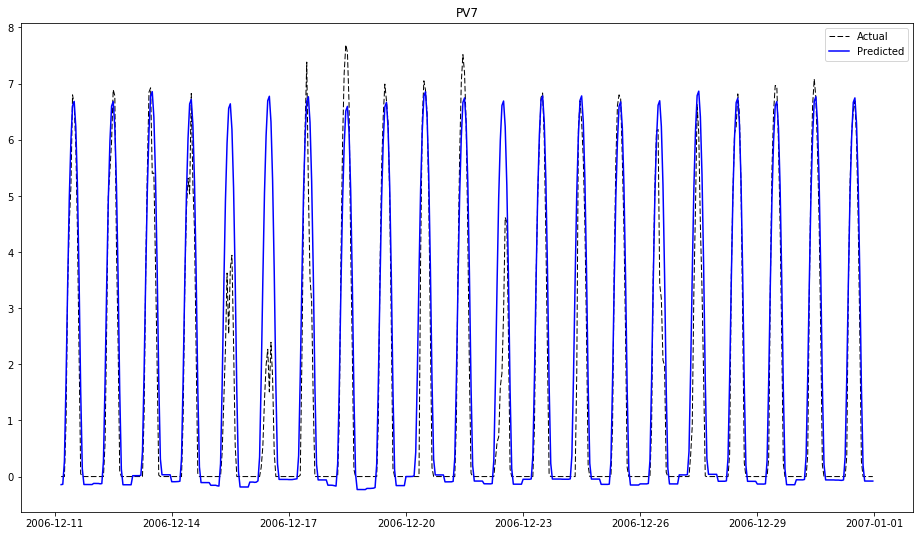

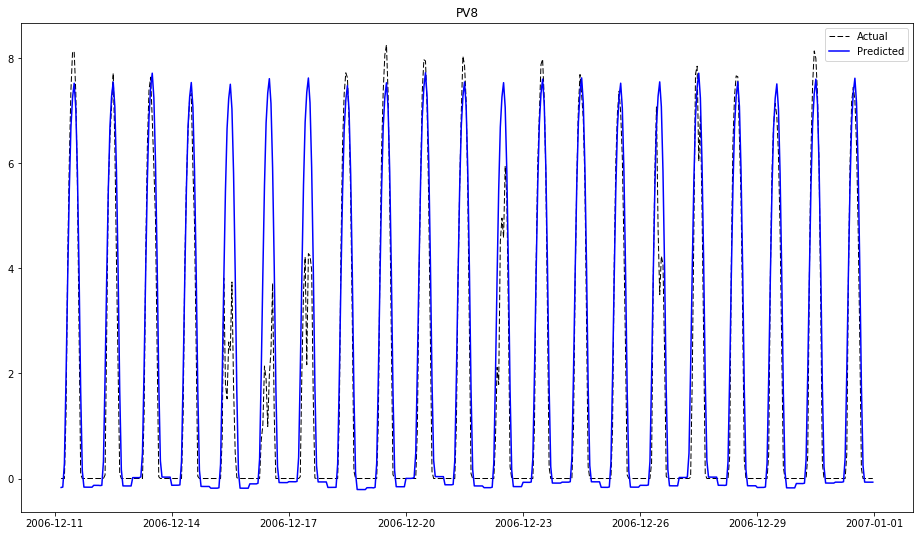

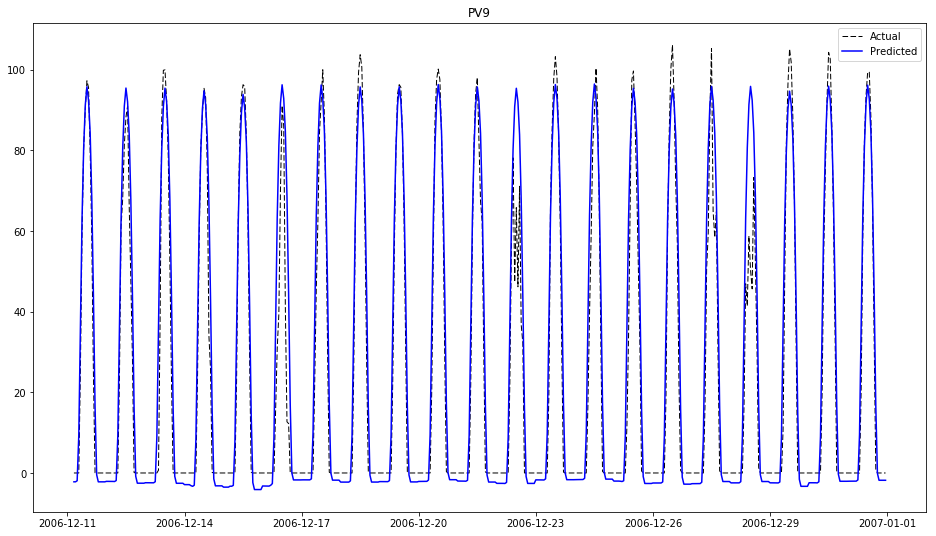

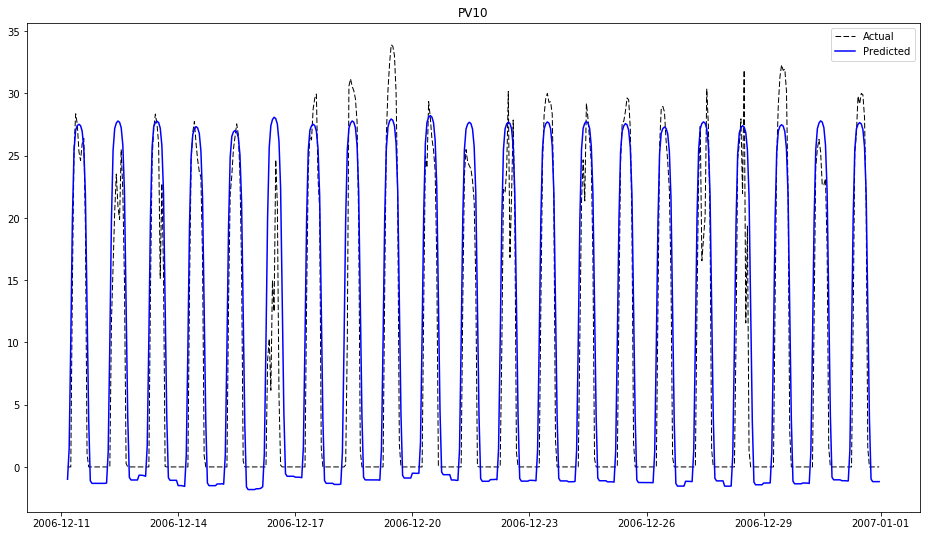

In [17]:
for solar in range(1, 11):
    plt.plot(results['DateTime'].iloc[-test_length:], results['pv%s' % solar].iloc[-test_length:],
             label='Actual', c='k', linestyle='--', linewidth=1)
    plt.plot(results['DateTime'].iloc[-test_length:], results['pv%s_pred' % solar].iloc[-test_length:],
             label='Predicted', c='b')
    plt.legend()
    plt.title('PV%s' % solar)
    plt.show()

Store the accuracy scores for the Linear Regression models.

In [18]:
import pickle
  
with open('csp-MASE.pkl', 'wb') as f:
    pickle.dump(MASE, f)
    
with open('csp-sMASE.pkl', 'wb') as f:
    pickle.dump(sMASE, f)